## 1. Load the MNIST dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print dataset shapes
print(f"Training set shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}, Labels shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training set shape: (60000, 28, 28), Labels shape: (60000,)
Test set shape: (10000, 28, 28), Labels shape: (10000,)


## 2. Visualize the MNIST Dataset

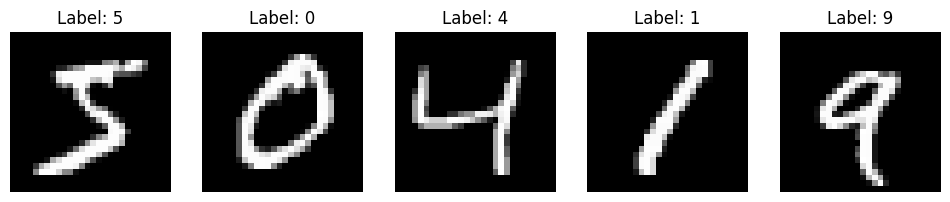

In [3]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis("off")

plt.show()

## 3. Data Preprocessing

In [4]:
# Import necessary libraries
from tensorflow.keras.utils import to_categorical

# Step 1: Normalize pixel values to range [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Step 2: Reshape images to (28, 28, 1) to match CNN input requirements
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Step 3: Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Step 4: Print the new shapes after preprocessing
print("Dataset after Preprocessing:")
print(f"- Training set shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"- Test set shape: {X_test.shape}, Labels shape: {y_test.shape}")


Dataset after Preprocessing:
- Training set shape: (60000, 28, 28, 1), Labels shape: (60000, 10)
- Test set shape: (10000, 28, 28, 1), Labels shape: (10000, 10)


## 4. Defining the CNN Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Step 1: Define the CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model

# Step 2: Print the model summary
model = create_cnn_model()
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Training the Model Using Different Optimizers

In [6]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, AdamW
import time

# Define a function to train the model with a specific optimizer
def train_model_with_optimizer(optimizer, optimizer_name, epochs=15):
    model = create_cnn_model()  # Recreate the model for each optimizer
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    print(f"\nTraining Model with {optimizer_name} Optimizer...\n")
    start_time = time.time()  # Track training time
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=1)
    end_time = time.time()
    
    training_time = end_time - start_time
    print(f"\n{optimizer_name} Training Time: {training_time:.2f} seconds\n")
    
    return history

# Train models with different optimizers
history_sgd = train_model_with_optimizer(SGD(learning_rate=0.01), "SGD")
history_momentum = train_model_with_optimizer(SGD(learning_rate=0.01, momentum=0.9), "SGD with Momentum")
history_rmsprop = train_model_with_optimizer(RMSprop(learning_rate=0.001), "RMSprop")
history_adam = train_model_with_optimizer(Adam(learning_rate=0.001), "Adam")
history_adamw = train_model_with_optimizer(AdamW(learning_rate=0.001), "AdamW")


Training Model with SGD Optimizer...

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.5635 - loss: 1.4530 - val_accuracy: 0.9066 - val_loss: 0.3053
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9174 - loss: 0.2731 - val_accuracy: 0.9465 - val_loss: 0.1763
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9464 - loss: 0.1789 - val_accuracy: 0.9556 - val_loss: 0.1449
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9593 - loss: 0.1383 - val_accuracy: 0.9623 - val_loss: 0.1179
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9681 - loss: 0.1076 - val_accuracy: 0.9703 - val_loss: 0.0960
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9720 - loss: 0.0915 - val_accuracy: 0.9755 - val_loss: 0.0824
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9753 - loss: 0.0863 - val_accuracy: 0.9782 - val_loss: 0.0702
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/st

## 6. Visualizing Model Performance


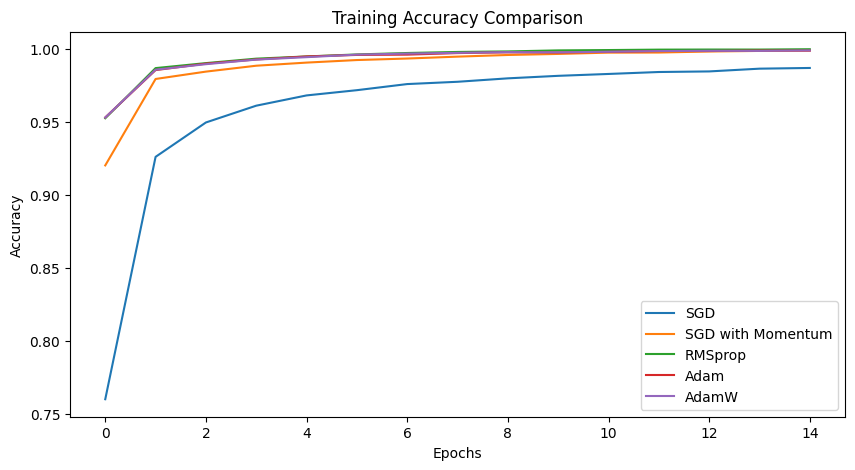

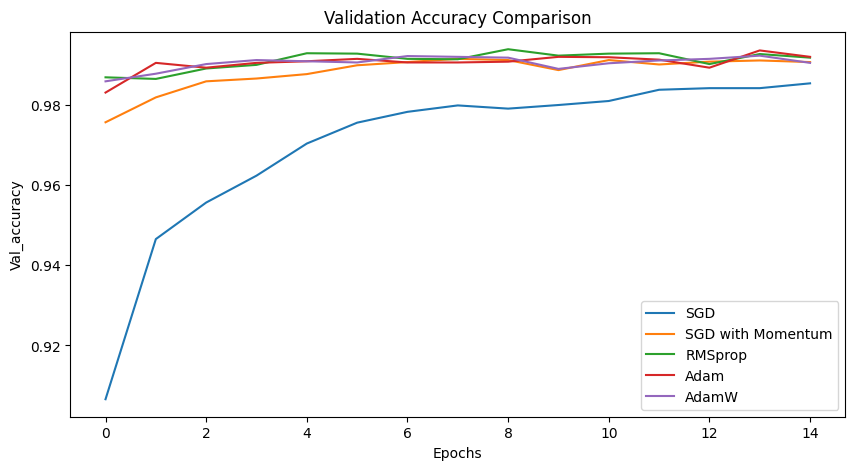

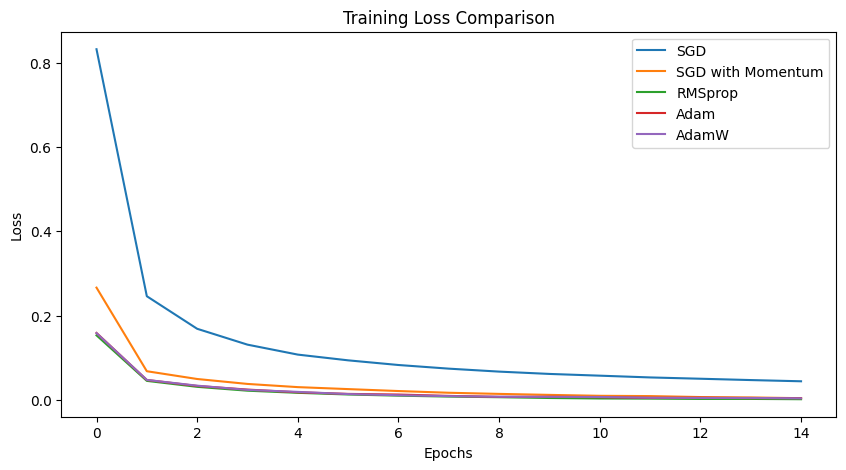

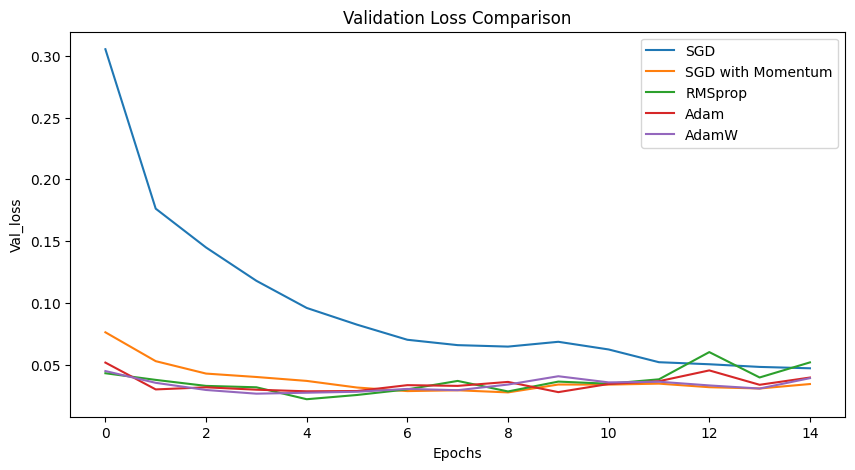

In [7]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss curves
def plot_results(histories, title, metric):
    plt.figure(figsize=(10, 5))
    
    for optimizer_name, history in histories.items():
        plt.plot(history.history[metric], label=f"{optimizer_name}")
    
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Store all training histories in a dictionary
histories = {
    "SGD": history_sgd,
    "SGD with Momentum": history_momentum,
    "RMSprop": history_rmsprop,
    "Adam": history_adam,
    "AdamW": history_adamw
}

# Plot Accuracy Curves
plot_results(histories, "Training Accuracy Comparison", "accuracy")
plot_results(histories, "Validation Accuracy Comparison", "val_accuracy")

# Plot Loss Curves
plot_results(histories, "Training Loss Comparison", "loss")
plot_results(histories, "Validation Loss Comparison", "val_loss")
